In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [5]:
close = pd.read_csv("./data/infomax_data/new/single/close.csv", encoding = "cp949", low_memory=False)
close = close.loc[:1371]
close.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2013-01-02,22250,NaN,NaN,13450,124500,32250,103500,362000,44450,...,248500,NaN,216000,32000,122500,43500,74300,NaN,4965,25600
1,2013-01-03,23000,NaN,NaN,13750,123500,32100,102000,369000,43800,...,248500,NaN,206000,31750,120500,41800,74800,NaN,4955,25500
2,2013-01-04,23700,NaN,NaN,13900,128000,32300,107500,375000,43600,...,243500,NaN,206000,32650,123500,41550,74700,NaN,4980,25050
3,2013-01-07,23800,NaN,NaN,14000,127000,32750,107500,368000,44500,...,241500,NaN,208500,33150,125500,44000,73400,NaN,5080,25650
4,2013-01-08,23700,NaN,NaN,14100,122500,32650,113000,358000,42800,...,237000,NaN,210000,32100,125000,43750,71100,NaN,5130,26250


In [11]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)
kospi200.head()

,종목코드,종목명
0,006840,AK홀딩스
1,027410,BGF
2,282330,BGF리테일
3,138930,BNK금융지주
4,001040,CJ


In [12]:
c_li = {}
li_c = {}
v_li = {}
li_v = {}
for i in range(len(kospi200)):
    c_li[close.columns[1:][i]] = kospi200["종목코드"][i]
    li_c[kospi200["종목코드"][i]] = close.columns[1:][i]
    v_li[close.columns[1:][i]] = "XKRX:" + kospi200["종목코드"][i]
    li_v["XKRX:" + kospi200["종목코드"][i]] = close.columns[1:][i]

In [13]:
ss = pd.read_csv("./data/stock_split_2.csv", encoding="cp949")
ss = ss[ss.columns[:3]]
ss["Split date"] = ss["Split date"].fillna(method="ffill")
ss["Company"] = [i[2] for i in list(map(lambda x : x.split("?"), ss["Company"]))]
ss["Company"] = [i[1:7]for i in ss["Company"]]
ss.columns = ["split_date", "code", "split_ratio"]
ss200 = ss.loc[[i in list(li_c.keys()) for i in ss["code"]]]
ss200["company"] = ss200["code"].replace(li_c)
ss.head()

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,split_date,code,split_ratio
0,2018-08-02,065440,1.055:1
1,2018-08-01,053270,1.125:1
2,2018-08-01,045060,1.086:1
3,2018-07-26,024910,1:2
4,2018-07-25,080530,2:1


In [309]:
df = close.copy()
df.index = close.일자
del df["일자"]

2018-07-11 2:1
2016-05-25 5:1


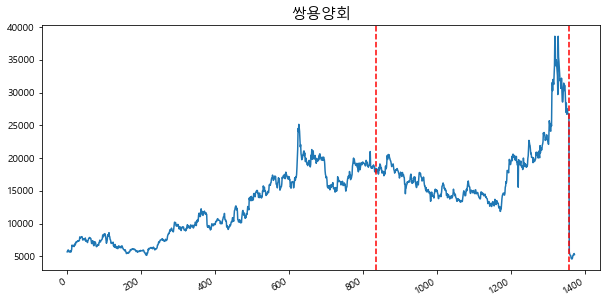

2018-05-08 5:1


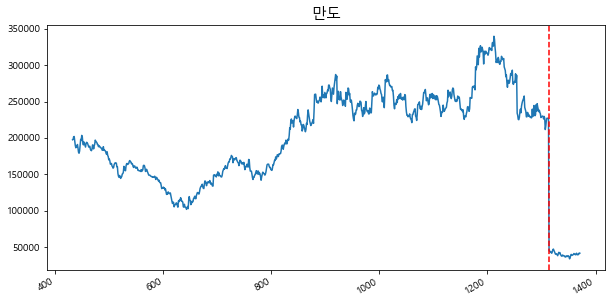

2018-05-04 50:1


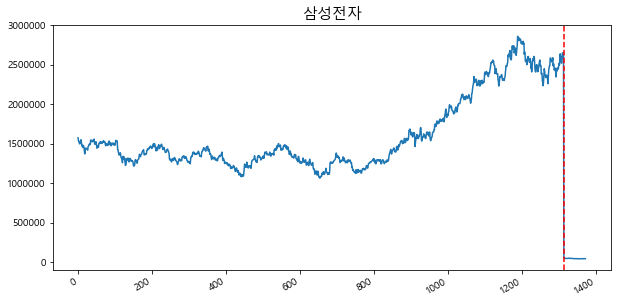

2018-04-30 10:1
2016-12-28 1.2:1
2015-12-29 1.1:1
2014-12-29 1.1:1
2013-12-30 1.05:1


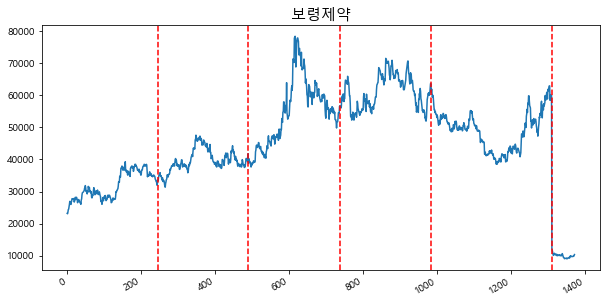

2018-03-07 1:2.5
2016-09-30 2:1


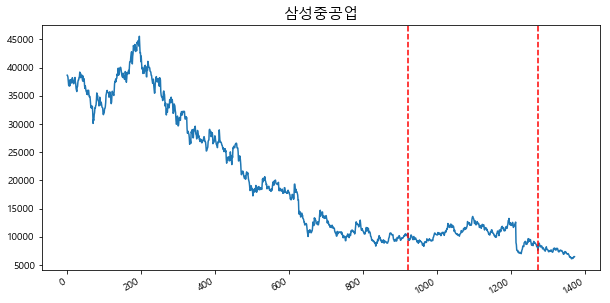

2018-02-05 1.071:1


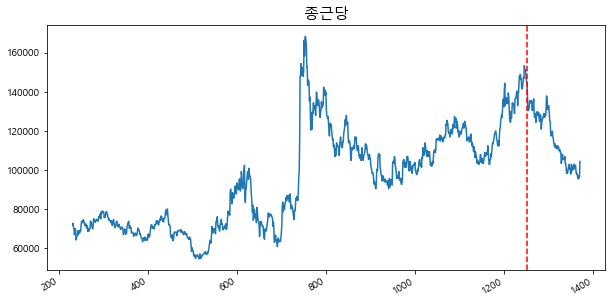

2018-01-31 2:1
2017-05-10 1.206:1


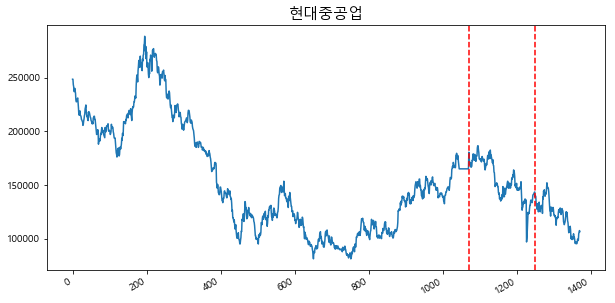

2018-01-11 1.034:1


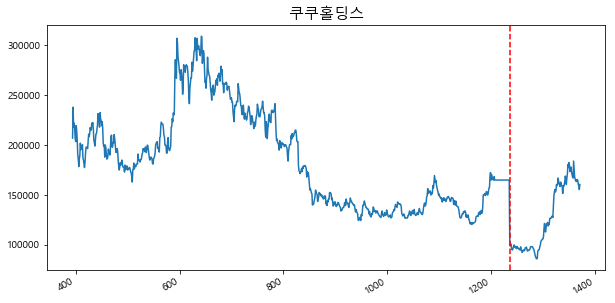

2018-01-05 1:4
2015-10-15 1.017:1


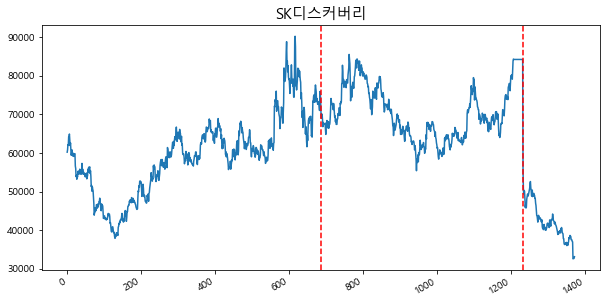

2017-12-27 1.02:1
2016-12-28 1.05:1
2015-12-29 1.03:1
2014-12-29 1.05:1
2013-12-27 1.03:1


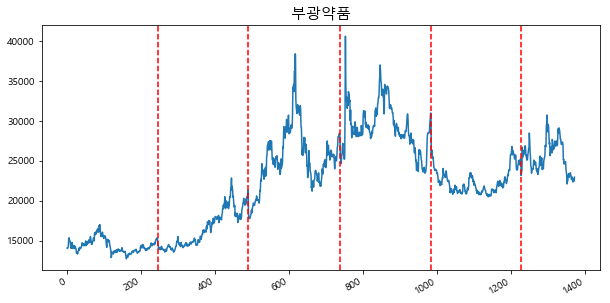

2017-12-27 1.02:1
2016-12-28 1.05:1
2015-12-29 1.03:1
2014-12-29 1.05:1
2013-12-27 1.05:1
2013-03-22 1:2


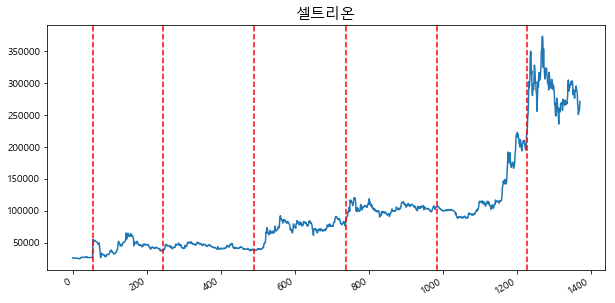

2017-12-27 1.02:1
2017-02-15 1.07:1
2015-12-29 1.02:1
2014-12-29 1.05:1
2014-02-10 1.104:1
2013-12-16 1.052:1


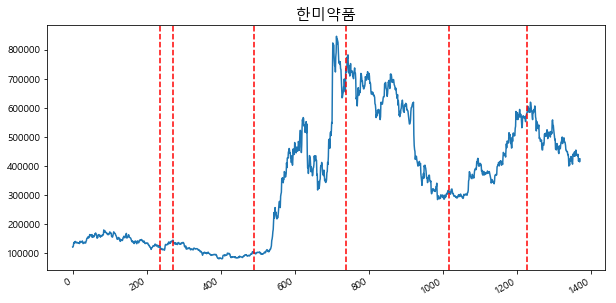

2017-12-27 1.05:1
2017-02-15 1.062:1
2015-12-29 1.005:1
2014-12-29 1.03:1
2013-12-30 1.1:1


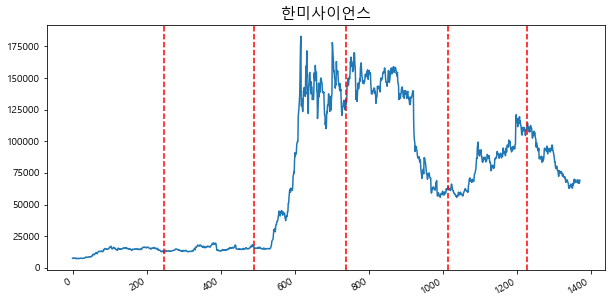

2017-12-27 1.02:1
2015-12-29 1.05:1
2014-12-29 1.05:1
2013-12-27 1.05:1


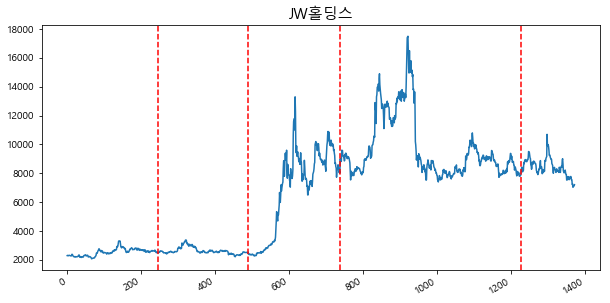

2017-12-27 1.015:1
2016-12-28 1.01:1
2015-12-29 1.03:1
2014-12-29 1.2:1
2013-12-27 1.06:1


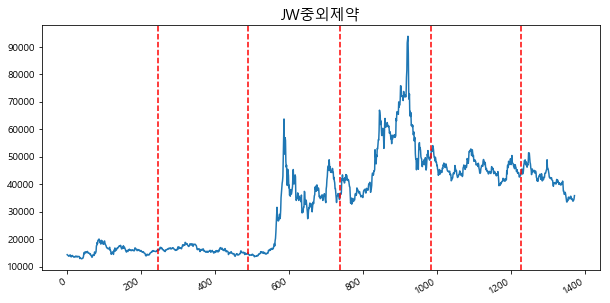

2017-12-27 1.5:1
2014-12-29 1.05:1


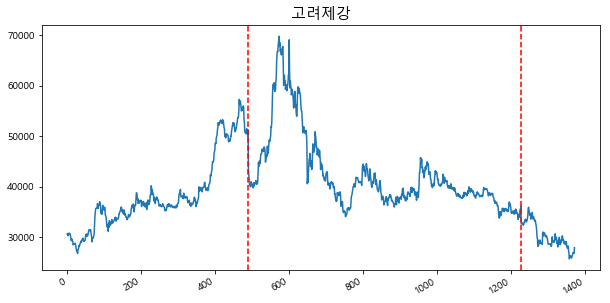

2017-12-27 3:1
2016-12-28 1.085:1


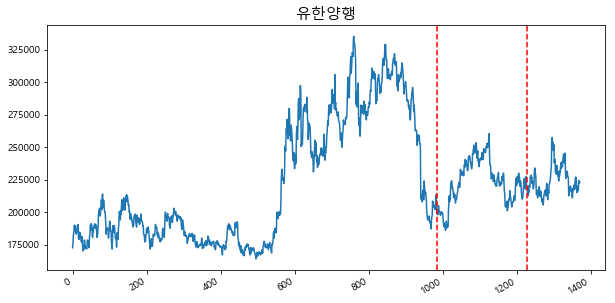

2017-12-08 2:1
2016-11-23 1.5:1


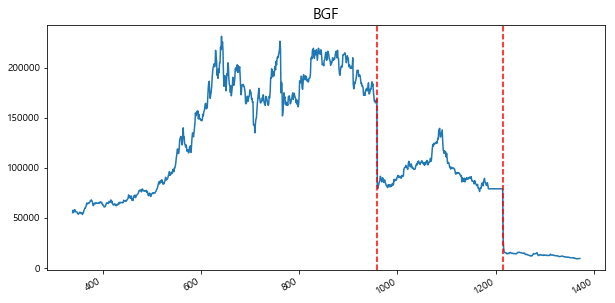

2017-10-30 1.76:1


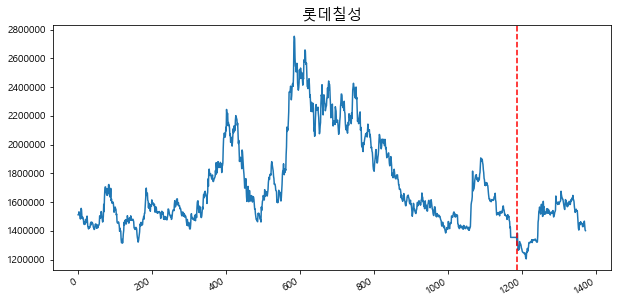

2017-10-30 1:1.21
2016-05-17 1.172:1


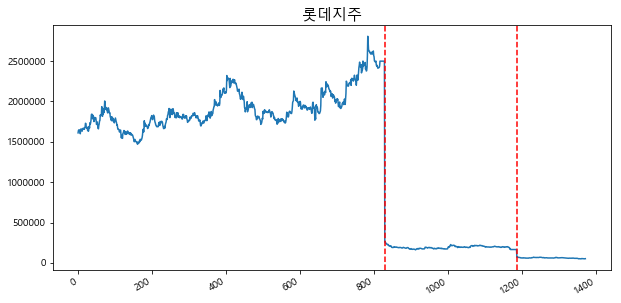

2017-10-30 1:1.12


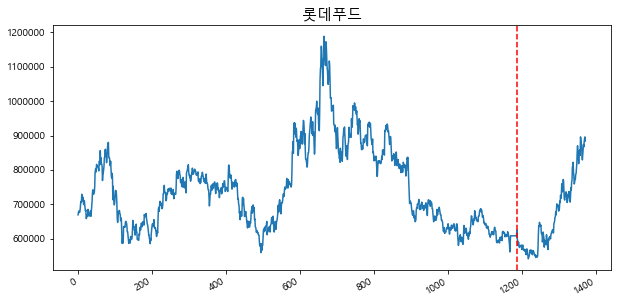

2017-10-30 1.322:1


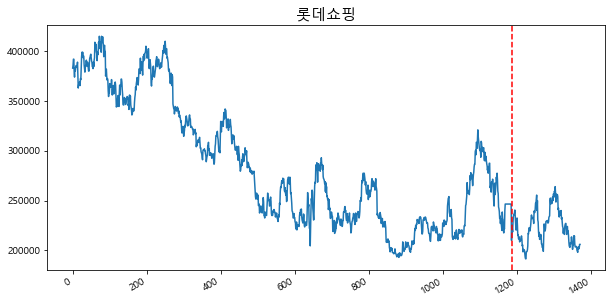

2017-07-24 1.06:1


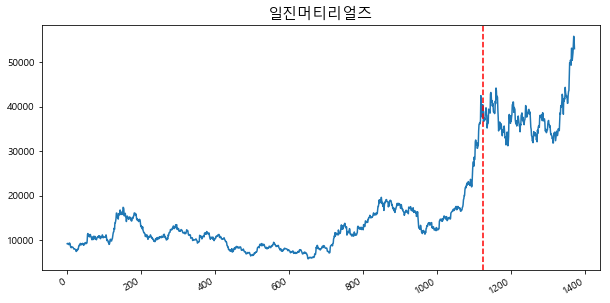

2017-07-07 2:1


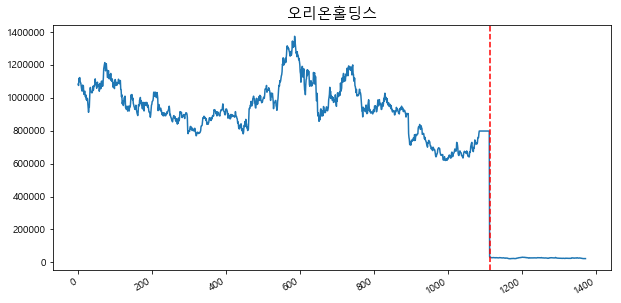

2017-01-31 2:1


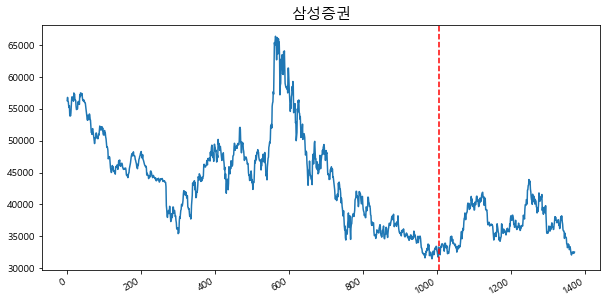

2017-01-24 50:1
2015-02-05 1.5:1
2013-09-16 1.033:1


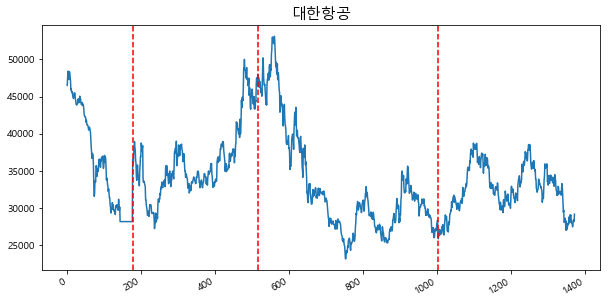

2017-01-16 1:6


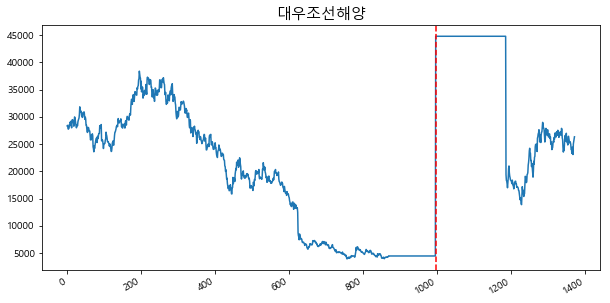

2016-11-09 1.5:1


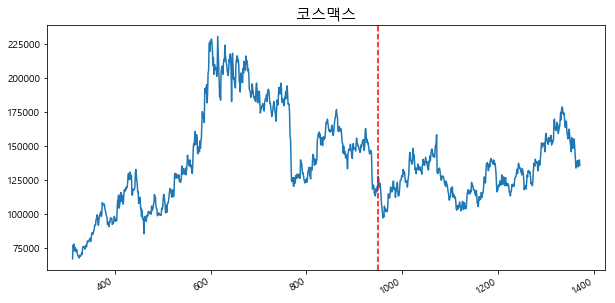

2016-02-16 1:10


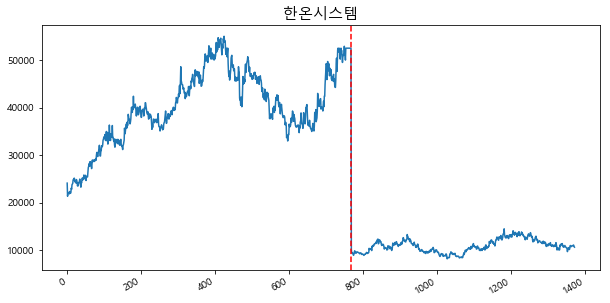

2015-12-29 1.034:1
2014-12-29 1.035:1
2013-12-27 1.03:1


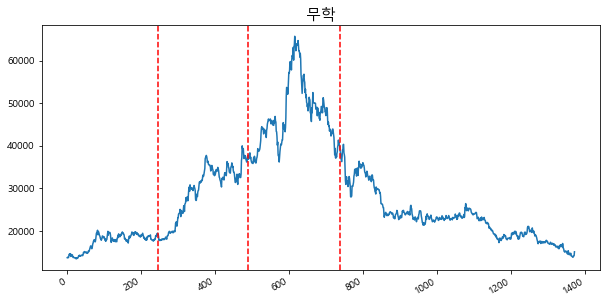

2015-12-29 1.107:1


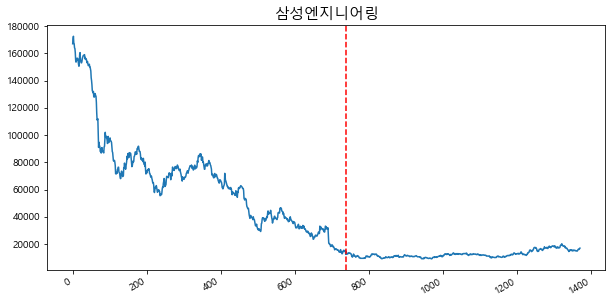

2015-12-04 2:1
2014-05-28 1:5


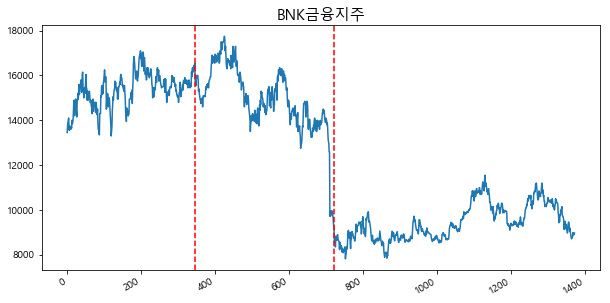

2015-07-31 1.555:1


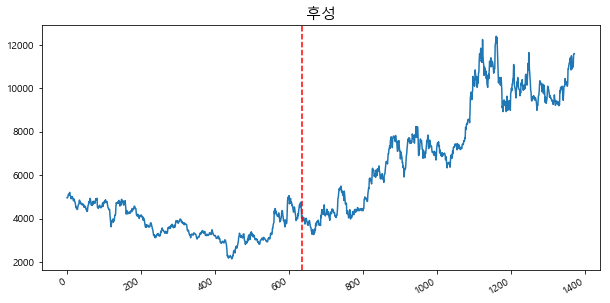

2015-07-29 1.04:1


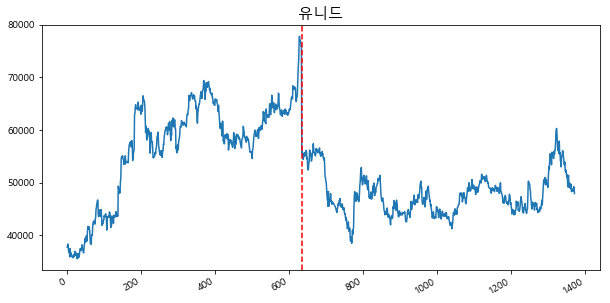

2015-07-27 1:2.91
2014-01-24 1:36.68


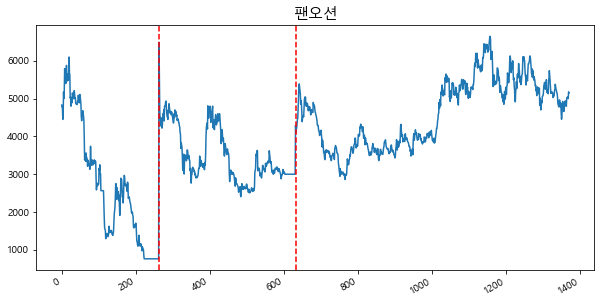

2015-07-16 1:8


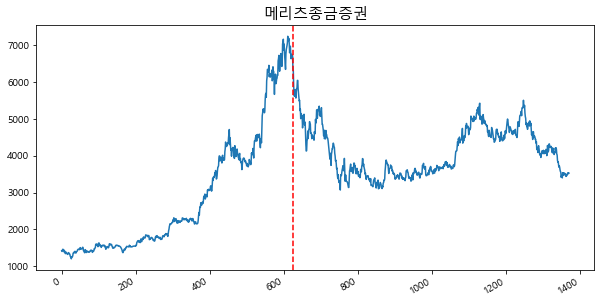

2015-06-09 10:1
2014-01-16 1.3:1


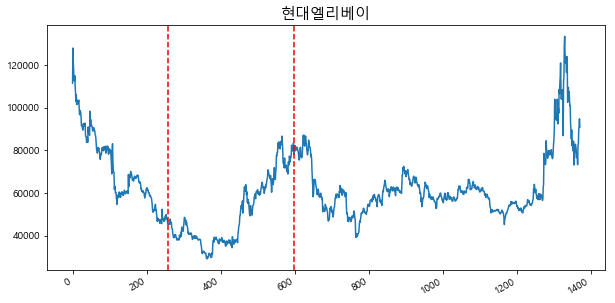

2015-05-08 10:1


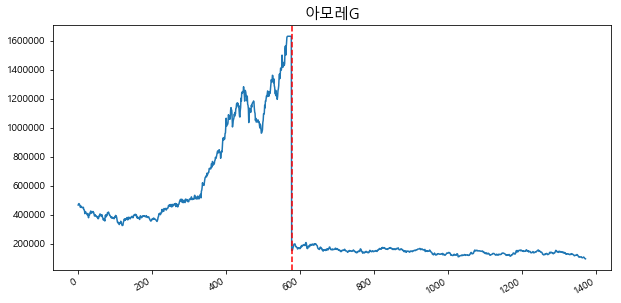

2015-05-08 10:1


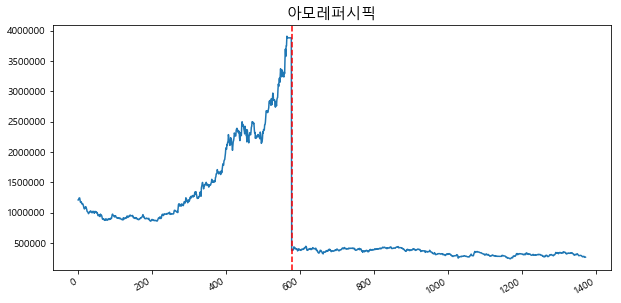

2014-10-06 1.226:1


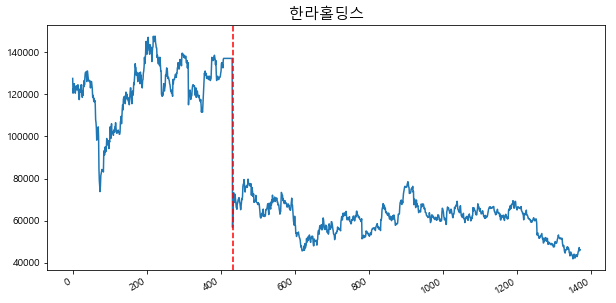

2014-07-07 1:5


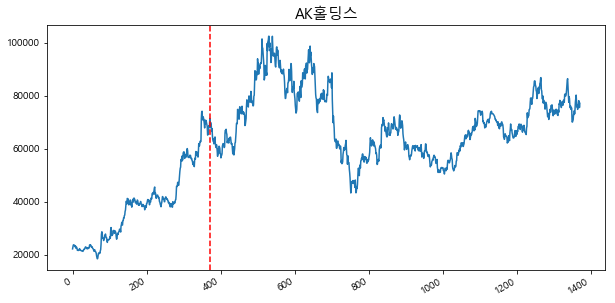

2014-07-02 1.051:1
2013-02-01 1.086:1


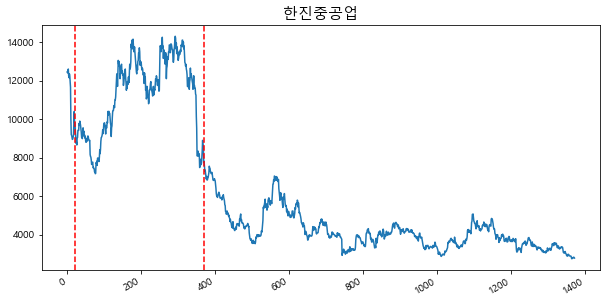

2014-06-20 1.043:1


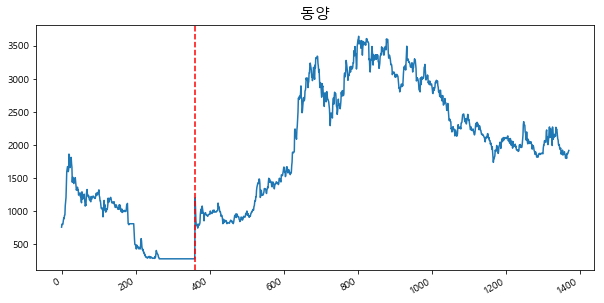

2014-05-16 1:5


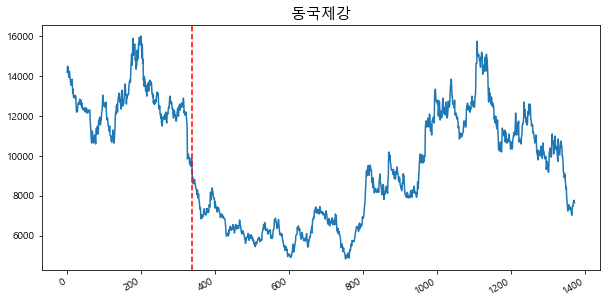

2014-04-23 1.356:1


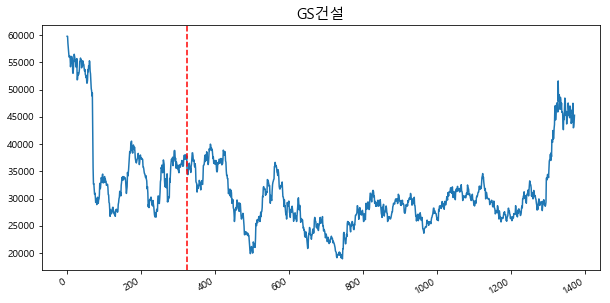

2013-11-27 1.057:1


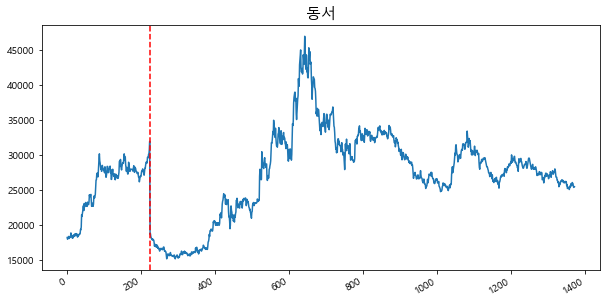

2013-09-05 2.5:1


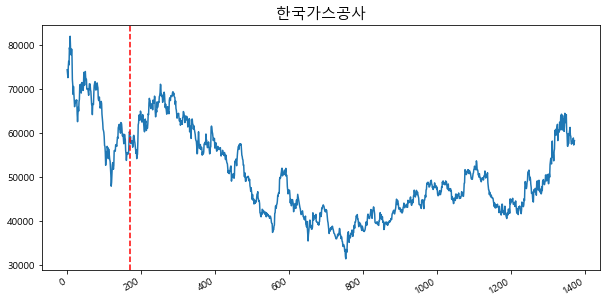

2013-08-29 1.187:1


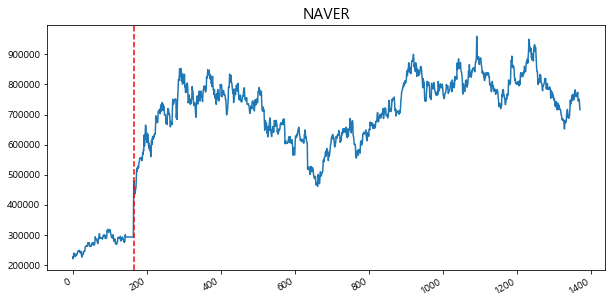

2013-06-07 1.4:1
2013-04-19 1.017:1


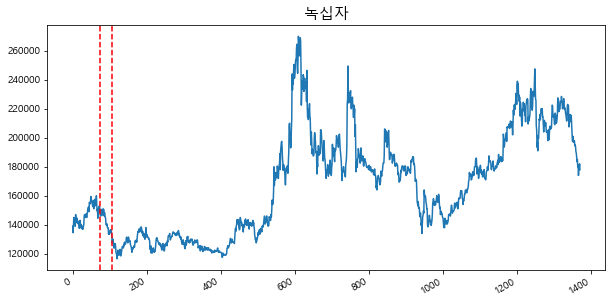

2013-04-08 1:2.69


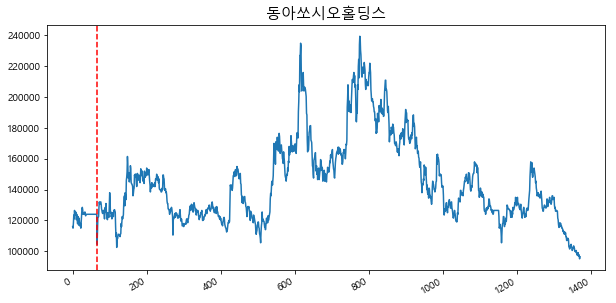

2013-01-28 1:10


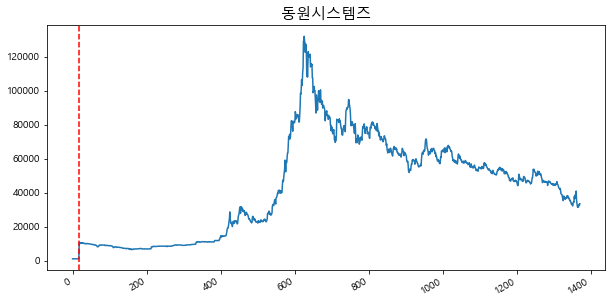

In [19]:
import sys
mod = sys.modules[__name__]

di = {}

for i in ss200.company.unique():
    temp = ss200[ss200.company == i].split_date
    time = ss200[ss200.company == i].split_date.iloc[0]
    ratio = ss200[ss200.company == i].split_ratio.iloc[0]
    indexing = np.where(close["일자"] == time)[0][0]
    close[i].plot(subplots=True, figsize=(10,5))
    plt.axvline(x=indexing, color='r',linestyle='--')
    if len(temp)>1:
        time_li = []
        ratio_li = []
        for j in range(1,len(temp)):
            setattr(mod, "time{}".format(j), ss200[ss200.company == i].split_date.iloc[j])
            setattr(mod, "ratio{}".format(j), ss200[ss200.company == i].split_ratio.iloc[j])
            indexing = np.where(close["일자"] == getattr(mod, "time{}".format(j)))[0][0]
            plt.axvline(x=indexing, color='r',linestyle='--')
            time_li.append(getattr(mod, "time{}".format(j)))
            ratio_li.append(getattr(mod, "ratio{}".format(j)))
        print(time, ratio)
        for m, n in zip(time_li, ratio_li):
            print(m, n)
        time_li.append(time)
        di[i] = time_li
    else:
        print(time, ratio)
        di[i] = time
    plt.title(i, fontsize=15)
    plt.show()

2013-11-27 224


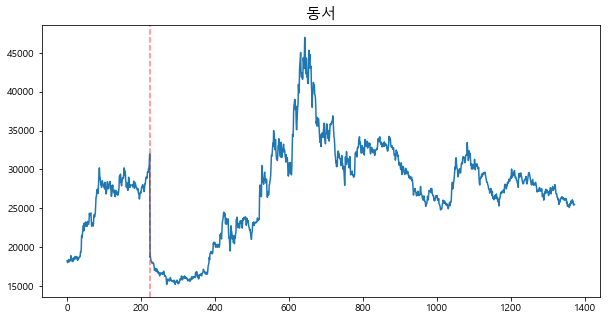

In [1262]:
i = "동서"
time = di[i]
close[i].plot(figsize=(10,5))
if len(time)>9:
    indexing = np.where(close["일자"] == time)[0][0]
    plt.axvline(x=indexing, color='r',linestyle='--', alpha=0.5)
else:
    for j in time:
        indexing = np.where(close["일자"] == j)[0][0]
        plt.axvline(x=indexing, color='r',linestyle='--', alpha=0.5)
plt.title(i, fontsize=15)
print(time, np.where(close["일자"] == time)[0][0])

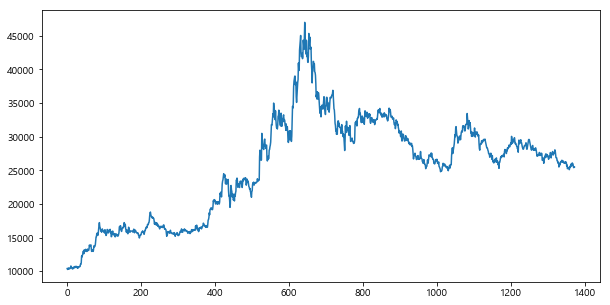

In [1263]:
plt.figure(figsize=(10,5))
test = df["동서"] = pd.concat((df.loc[:"2013-11-26"]["동서"] / 1.7525, df.loc["2013-11-27":]["동서"]))
#test.iloc[224] = (test.iloc[223]+test.iloc[225])/2
t = test.copy()
t.index = range(len(test))
plt.plot(t)
plt.show()

In [1252]:
close.loc[123]["일자"]

'2013-07-01'

In [1253]:
close.loc[184]["일자"]

'2013-09-30'

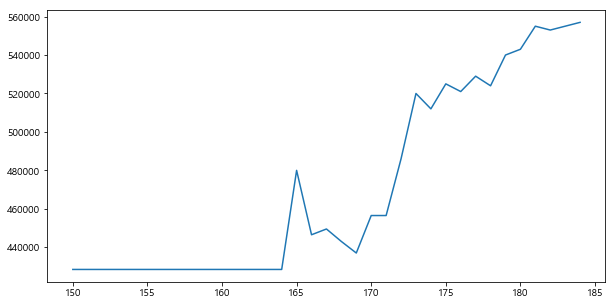

(557000.0, 428451.3)

In [1254]:
plt.figure(figsize=(10,5))
s = t.loc[150:184]
plt.plot(s)
plt.show()
max(s), min(s)

In [1113]:
test.loc["2018-01-05"]

28150.0

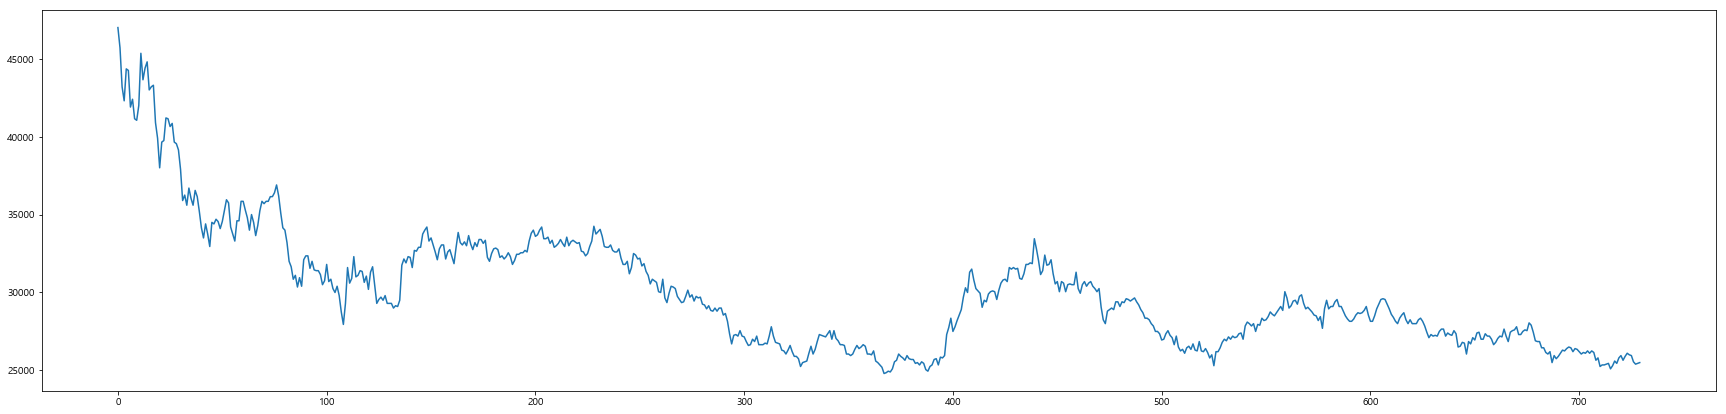

(47000.0, 24800.0)

In [1081]:
plt.figure(figsize=(30,7))
t = test.loc["2015-08-10":]
t.index = range(len(t))
plt.plot(t)
plt.show()
max(t), min(t)

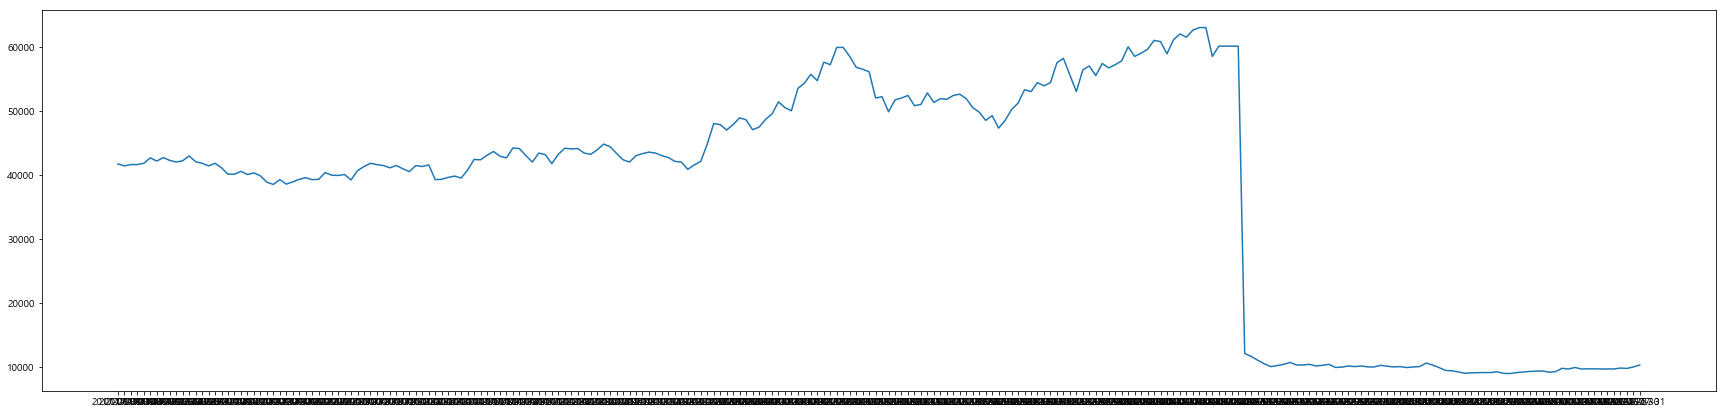

In [112]:
plt.figure(figsize=(30,7))
plt.plot(df.loc["2015-08-10":][i])
plt.show()

In [113]:
df[i] = test

In [177]:
df_쿠쿠.head()

일자
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-07   NaN
2013-01-08   NaN
Name: 쿠쿠홀딩스, dtype: float64

In [656]:
import openpyxl

In [658]:
wd = openpyxl.load_workbook('현재가.xlsx')
wd2 = openpyxl.load_workbook('전일대비.xlsx')

In [659]:
wd.sheetnames, wd2.sheetnames

(['Sheet1', 'Sheet2', 'Sheet3'], ['Sheet1', 'Sheet2', 'Sheet3'])

In [660]:
ws = wd.active
ws2 = wd2.active

In [661]:
ws, ws2

(<Worksheet "Sheet1">, <Worksheet "Sheet1">)

In [662]:
g = ws.rows

In [663]:
next(g)

(<Cell 'Sheet1'.A1>,
 <Cell 'Sheet1'.B1>,
 <Cell 'Sheet1'.C1>,
 <Cell 'Sheet1'.D1>,
 <Cell 'Sheet1'.E1>,
 <Cell 'Sheet1'.F1>,
 <Cell 'Sheet1'.G1>,
 <Cell 'Sheet1'.H1>,
 <Cell 'Sheet1'.I1>,
 <Cell 'Sheet1'.J1>,
 <Cell 'Sheet1'.K1>,
 <Cell 'Sheet1'.L1>,
 <Cell 'Sheet1'.M1>,
 <Cell 'Sheet1'.N1>,
 <Cell 'Sheet1'.O1>,
 <Cell 'Sheet1'.P1>,
 <Cell 'Sheet1'.Q1>,
 <Cell 'Sheet1'.R1>,
 <Cell 'Sheet1'.S1>,
 <Cell 'Sheet1'.T1>,
 <Cell 'Sheet1'.U1>,
 <Cell 'Sheet1'.V1>,
 <Cell 'Sheet1'.W1>,
 <Cell 'Sheet1'.X1>,
 <Cell 'Sheet1'.Y1>,
 <Cell 'Sheet1'.Z1>,
 <Cell 'Sheet1'.AA1>,
 <Cell 'Sheet1'.AB1>,
 <Cell 'Sheet1'.AC1>,
 <Cell 'Sheet1'.AD1>,
 <Cell 'Sheet1'.AE1>,
 <Cell 'Sheet1'.AF1>,
 <Cell 'Sheet1'.AG1>,
 <Cell 'Sheet1'.AH1>,
 <Cell 'Sheet1'.AI1>,
 <Cell 'Sheet1'.AJ1>,
 <Cell 'Sheet1'.AK1>,
 <Cell 'Sheet1'.AL1>,
 <Cell 'Sheet1'.AM1>,
 <Cell 'Sheet1'.AN1>,
 <Cell 'Sheet1'.AO1>,
 <Cell 'Sheet1'.AP1>,
 <Cell 'Sheet1'.AQ1>,
 <Cell 'Sheet1'.AR1>,
 <Cell 'Sheet1'.AS1>,
 <Cell 'Sheet1'.AT1>,
 <Cell 'Sheet1

In [664]:
keys = []
for cell in next(g):
    keys.append(cell.value)

In [665]:
keys

['일자',
 'AK홀딩스',
 'BGF',
 'BGF리테일',
 'BNK금융지주',
 'CJ',
 'CJ CGV',
 'CJ대한통운',
 'CJ제일제당',
 'DB손해보험',
 'DB하이텍',
 'GKL',
 'GS',
 'GS건설',
 'GS리테일',
 'HDC',
 'HDC현대산업개발',
 'JW중외제약',
 'JW홀딩스',
 'KB금융',
 'KCC',
 'KT',
 'KT&G',
 'LF',
 'LG',
 'LG디스플레이',
 'LG상사',
 'LG생활건강',
 'LG유플러스',
 'LG이노텍',
 'LG전자',
 'LG하우시스',
 'LG화학',
 'LIG넥스원',
 'LS',
 'LS산전',
 'NAVER',
 'NH투자증권',
 'OCI',
 'POSCO',
 'S&T모티브',
 'S-OIL',
 'SBS',
 'SK',
 'SKC',
 'SK네트웍스',
 'SK디스커버리',
 'SK이노베이션',
 'SK케미칼',
 'SK텔레콤',
 'SK하이닉스',
 'SPC삼립',
 '강원랜드',
 '고려아연',
 '고려제강',
 '금호석유',
 '금호타이어',
 '기아차',
 '기업은행',
 '남양유업',
 '남해화학',
 '넥센타이어',
 '넷마블',
 '녹십자',
 '녹십자홀딩스',
 '농심',
 '대교',
 '대덕전자',
 '대림산업',
 '대상',
 '대우건설',
 '대우조선해양',
 '대웅제약',
 '대한유화',
 '대한항공',
 '동국제강',
 '동서',
 '동아쏘시오홀딩스',
 '동아에스티',
 '동양',
 '동원F&B',
 '동원시스템즈',
 '두산',
 '두산밥캣',
 '두산인프라코어',
 '두산중공업',
 '락앤락',
 '롯데쇼핑',
 '롯데정밀화학',
 '롯데지주',
 '롯데칠성',
 '롯데케미칼',
 '롯데푸드',
 '롯데하이마트',
 '만도',
 '메리츠종금증권',
 '무학',
 '미래에셋대우',
 '보령제약',
 '부광약품',
 '빙그레',
 '삼성SDI',
 '삼성물산',
 '삼성바이오로직스',
 '삼성생명',
 '삼성에스디에스'

In [666]:
raw_data = []
for row in g:
    row_dict = { key : cell.value for key, cell in zip(keys, row) }
    raw_data.append(row_dict)

In [671]:
gt = ws.columns

In [672]:
day = []
for cell in next(gt):
    day.append(cell.value)

In [677]:
datetime.datetime(2018,8,10,1,1).year

2018

In [709]:
date = pd.DataFrame(day[3:]).loc[:1627]

In [678]:
import datetime
close_data = pd.DataFrame(raw_data)

In [683]:
close_data.drop(0, inplace=True)

In [684]:
close_data.head()

,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
1,74800,9750,171500,8530,146000,59300,150500,354000,67600,15800,...,110500,366500,126000,36950,118000,102500,43550,49350,11300,26900
2,74800,9600,169500,8510,142000,58700,151000,341500,66200,16050,...,111500,372500,126000,36700,117000,107000,43650,51300,11650,26850
3,75400,9490,166000,8560,143500,60000,150500,339500,66200,16950,...,112500,368500,127500,37450,115000,104000,44550,51400,11800,27750
4,76000,9540,167500,8570,145000,60600,152500,343500,68100,16100,...,111500,375000,125000,38550,113000,104000,44800,51000,11850,30900
5,75800,9590,168000,8590,143500,61000,151500,347000,68000,16450,...,111000,366000,124500,38350,113500,104500,45600,51900,11750,30900


In [688]:
close_data["일자"] = day[3:]

In [706]:
close_data.index = range(len(close_data))

In [710]:
close_data = close_data.loc[:1627]

In [732]:
list(close_data.columns).index("일자")

140

In [734]:
li = list(close_data.columns)
li.pop(140)

'일자'

In [736]:
"일자" in li

False

In [740]:
li.insert(0, "일자")

In [743]:
close_data = close_data[li]

In [744]:
close_data.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,,74800,9750,171500,8530,146000,59300,150500,354000,67600,...,110500,366500,126000,36950,118000,102500,43550,49350,11300,26900
1,,74800,9600,169500,8510,142000,58700,151000,341500,66200,...,111500,372500,126000,36700,117000,107000,43650,51300,11650,26850
2,,75400,9490,166000,8560,143500,60000,150500,339500,66200,...,112500,368500,127500,37450,115000,104000,44550,51400,11800,27750
3,,76000,9540,167500,8570,145000,60600,152500,343500,68100,...,111500,375000,125000,38550,113000,104000,44800,51000,11850,30900
4,,75800,9590,168000,8590,143500,61000,151500,347000,68000,...,111000,366000,124500,38350,113500,104500,45600,51900,11750,30900


In [746]:
close_data.일자 = 1

In [747]:
close_data.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,1,74800,9750,171500,8530,146000,59300,150500,354000,67600,...,110500,366500,126000,36950,118000,102500,43550,49350,11300,26900
1,1,74800,9600,169500,8510,142000,58700,151000,341500,66200,...,111500,372500,126000,36700,117000,107000,43650,51300,11650,26850
2,1,75400,9490,166000,8560,143500,60000,150500,339500,66200,...,112500,368500,127500,37450,115000,104000,44550,51400,11800,27750
3,1,76000,9540,167500,8570,145000,60600,152500,343500,68100,...,111500,375000,125000,38550,113000,104000,44800,51000,11850,30900
4,1,75800,9590,168000,8590,143500,61000,151500,347000,68000,...,111000,366000,124500,38350,113500,104500,45600,51900,11750,30900


In [784]:
day[3:][0].strftime("%Y-%m-%d")

'2018-08-10'

In [789]:
day[3:][1627].strftime("%Y-%m-%d")

'2012-01-02'

In [794]:
date = []
for k in range(len(day[3:])):
    date.append(str(day[3:][k]))

In [799]:
len(close_data)

1628

In [800]:
len([i[:10] for i in date])

5000

In [804]:
[i[:10] for i in date][:1628][-1]

'2012-01-02'

In [805]:
close_data["일자"] = [i[:10] for i in date][:1628]

In [809]:
close_df = close_data.reindex(index=close_data.index[::-1])
close_df.index = range(len(close_df))

In [810]:
close_df.head(n=2)

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2012-01-02,38000,None,None,10650,77000,26650,74200,295000,51000,...,258500,None,212500,33150,126500,40150,52900,None,7930,19650
1,2012-01-03,39300,None,None,11250,77600,26800,80400,308000,51500,...,273500,None,221500,33100,127000,41100,53500,None,8130,20100


In [811]:
import openpyxl
wd2 = openpyxl.load_workbook('전일대비.xlsx')
ws2 = wd2.active

In [812]:
ws2

<Worksheet "Sheet1">

In [813]:
g = ws2.rows

In [814]:
next(g)

(<Cell 'Sheet1'.A1>,
 <Cell 'Sheet1'.B1>,
 <Cell 'Sheet1'.C1>,
 <Cell 'Sheet1'.D1>,
 <Cell 'Sheet1'.E1>,
 <Cell 'Sheet1'.F1>,
 <Cell 'Sheet1'.G1>,
 <Cell 'Sheet1'.H1>,
 <Cell 'Sheet1'.I1>,
 <Cell 'Sheet1'.J1>,
 <Cell 'Sheet1'.K1>,
 <Cell 'Sheet1'.L1>,
 <Cell 'Sheet1'.M1>,
 <Cell 'Sheet1'.N1>,
 <Cell 'Sheet1'.O1>,
 <Cell 'Sheet1'.P1>,
 <Cell 'Sheet1'.Q1>,
 <Cell 'Sheet1'.R1>,
 <Cell 'Sheet1'.S1>,
 <Cell 'Sheet1'.T1>,
 <Cell 'Sheet1'.U1>,
 <Cell 'Sheet1'.V1>,
 <Cell 'Sheet1'.W1>,
 <Cell 'Sheet1'.X1>,
 <Cell 'Sheet1'.Y1>,
 <Cell 'Sheet1'.Z1>,
 <Cell 'Sheet1'.AA1>,
 <Cell 'Sheet1'.AB1>,
 <Cell 'Sheet1'.AC1>,
 <Cell 'Sheet1'.AD1>,
 <Cell 'Sheet1'.AE1>,
 <Cell 'Sheet1'.AF1>,
 <Cell 'Sheet1'.AG1>,
 <Cell 'Sheet1'.AH1>,
 <Cell 'Sheet1'.AI1>,
 <Cell 'Sheet1'.AJ1>,
 <Cell 'Sheet1'.AK1>,
 <Cell 'Sheet1'.AL1>,
 <Cell 'Sheet1'.AM1>,
 <Cell 'Sheet1'.AN1>,
 <Cell 'Sheet1'.AO1>,
 <Cell 'Sheet1'.AP1>,
 <Cell 'Sheet1'.AQ1>,
 <Cell 'Sheet1'.AR1>,
 <Cell 'Sheet1'.AS1>,
 <Cell 'Sheet1'.AT1>,
 <Cell 'Sheet1

In [815]:
keys = []
for cell in next(g):
    keys.append(cell.value)
raw_data = []
for row in g:
    row_dict = { key : cell.value for key, cell in zip(keys, row) }
    raw_data.append(row_dict)

In [828]:
diff = pd.DataFrame(raw_data).drop(0)
diff = diff.loc[:1628]
diff.index = range(len(diff))
diff = diff[li]
diff["일자"] = [i[:10] for i in date][:1628]
diff.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2018-08-10,0,150,2000,20,4000,600,-500,12500,1400,...,-1000,-6000,0,250,1000,-4500,-100,-1950,-350,50
1,2018-08-09,-600,110,3500,-50,-1500,-1300,500,2000,0,...,-1000,4000,-1500,-750,2000,3000,-900,-100,-150,-900
2,2018-08-08,-600,-50,-1500,-10,-1500,-600,-2000,-4000,-1900,...,1000,-6500,2500,-1100,2000,0,-250,400,-50,-3150
3,2018-08-07,200,-50,-500,-20,1500,-400,1000,-3500,100,...,500,9000,500,200,-500,-500,-800,-900,100,0
4,2018-08-06,-800,100,3500,90,3000,0,-2500,3000,3000,...,2500,5500,500,1400,2000,0,600,300,-350,-850


In [844]:
a = close_data.iloc[2:]

In [849]:
a["일자"] = [i[:10] for i in date][2:1628]

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [882]:
b = a.iloc[0][li[1:]].values

In [879]:
d = diff.iloc[2:][li[1:]].fillna(0).values * -1

In [880]:
d

array([[  600,    50,  1500, ...,  -400,    50,  3150],
       [ -200,    50,   500, ...,   900,  -100,     0],
       [  800,  -100, -3500, ...,  -300,   350,   850],
       ...,
       [  150,     0,     0, ...,     0,   340,   -50],
       [-1300,     0,     0, ...,     0,  -200,  -450],
       [-1500,     0,     0, ...,     0,    30,   300]], dtype=int64)

In [883]:
b

array([75400, 9490, 166000, 8560, 143500, 60000, 150500, 339500, 66200,
       16950, 23850, 53200, 43750, 32700, 24650, 56600, 36100, 7420,
       52600, 342500, 28700, 105500, 26450, 73300, 21600, 23400, 1214000,
       15450, 153000, 75900, 69500, 376000, 34250, 71700, 71100, 750000,
       12900, 102000, 333000, 33350, 116500, 19000, 256500, 44250, 4670,
       33200, 188500, 88200, 252000, 79800, 110500, 26000, 403000, 27350,
       103000, 6210, 32150, 15350, 637000, 15200, 10550, 142000, 186000,
       30700, 292500, 7390, 8730, 77000, 24250, 5390, 26700, 189000,
       240500, 28500, 8200, 25450, 99500, 99900, 1890, 295500, 32050,
       109500, 33750, 9920, 14800, 18200, 203500, 61500, 51200, 1395000,
       352500, 851000, 77100, 39600, 3680, 14550, 8060, 10300, 22850,
       60300, 225500, 126000, 454000, 97900, 227000, 16900, 149500, 46800,
       6620, 31900, 35350, 277000, 77500, 107500, 31200, 20550, 70400,
       276000, 321000, 43400, 5160, 4810, 101000, 270500, 30250,

In [884]:
b.shape, d.shape

((202,), (1626, 202))

In [888]:
e = d.cumsum(axis=0)

In [891]:
d

array([[  600,    50,  1500, ...,  -400,    50,  3150],
       [ -200,    50,   500, ...,   900,  -100,     0],
       [  800,  -100, -3500, ...,  -300,   350,   850],
       ...,
       [  150,     0,     0, ...,     0,   340,   -50],
       [-1300,     0,     0, ...,     0,  -200,  -450],
       [-1500,     0,     0, ...,     0,    30,   300]], dtype=int64)

In [889]:
e

array([[   600,     50,   1500, ...,   -400,     50,   3150],
       [   400,    100,   2000, ...,    500,    -50,   3150],
       [  1200,      0,  -1500, ...,    200,    300,   4000],
       ...,
       [-48450, -75040, -16500, ...,   8400,  -3755,  -7650],
       [-49750, -75040, -16500, ...,   8400,  -3955,  -8100],
       [-51250, -75040, -16500, ...,   8400,  -3925,  -7800]], dtype=int64)

In [890]:
b + e

array([[76000, 9540, 167500, ..., 51000, 11850, 30900],
       [75800, 9590, 168000, ..., 51900, 11750, 30900],
       [76600, 9490, 164500, ..., 51600, 12100, 31750],
       ...,
       [26950, -65550, 149500, ..., 59800, 8045, 20100],
       [25650, -65550, 149500, ..., 59800, 7845, 19650],
       [24150, -65550, 149500, ..., 59800, 7875, 19950]], dtype=object)

In [892]:
[i[1] for i in d]

[50,
 50,
 -100,
 -120,
 170,
 -30,
 -150,
 -10,
 0,
 0,
 20,
 -140,
 -70,
 240,
 100,
 270,
 -30,
 560,
 -200,
 100,
 100,
 0,
 0,
 -100,
 50,
 -50,
 300,
 300,
 0,
 100,
 -150,
 200,
 -200,
 50,
 300,
 150,
 -150,
 0,
 300,
 300,
 150,
 -50,
 100,
 -250,
 -150,
 -50,
 -100,
 50,
 300,
 250,
 -50,
 250,
 50,
 0,
 150,
 -50,
 0,
 300,
 150,
 250,
 -200,
 100,
 -100,
 350,
 250,
 450,
 -1150,
 -150,
 0,
 -200,
 200,
 150,
 -50,
 -200,
 350,
 150,
 -100,
 -100,
 400,
 -550,
 -150,
 400,
 -100,
 150,
 0,
 500,
 -150,
 -150,
 -450,
 -250,
 350,
 800,
 1700,
 -200,
 -550,
 -250,
 0,
 -50,
 -100,
 250,
 -650,
 -400,
 -1050,
 -150,
 -300,
 350,
 300,
 -100,
 200,
 150,
 150,
 400,
 0,
 450,
 -250,
 200,
 -100,
 700,
 750,
 -200,
 0,
 -150,
 150,
 150,
 350,
 0,
 50,
 200,
 200,
 -100,
 -150,
 100,
 -200,
 -700,
 -450,
 -100,
 50,
 150,
 0,
 150,
 -250,
 350,
 200,
 -200,
 0,
 450,
 400,
 50,
 -250,
 -900,
 200,
 350,
 -750,
 0,
 350,
 550,
 200,
 -50,
 150,
 1050,
 3600,
 8550,
 12200,
 0,
 0

In [1264]:
df["쌍용양회"] = pd.concat((df.loc[:"2018-07-10"]["쌍용양회"] / 5, df.loc["2018-07-11":]["쌍용양회"]))
df["만도"] = pd.concat((df.loc[:"2018-05-07"]["만도"] / 5, df.loc["2018-05-08":]["만도"]))
df["삼성전자"] = pd.concat((df.loc[:"2018-05-03"]["삼성전자"] / 50, df.loc["2018-05-04":]["삼성전자"]))
df["보령제약"] = pd.concat((df.loc[:"2018-04-29"]["보령제약"] / 5, df.loc["2018-04-30":]["보령제약"]))
df["쿠쿠홀딩스"] = pd.concat((df.loc[:"2018-01-10"]["쿠쿠홀딩스"] / 1.318, df.loc["2018-01-11":]["쿠쿠홀딩스"]))
df["SK디스커버리"] = pd.concat((df.loc[:"2018-01-04"]["SK디스커버리"] / 1.6, df.loc["2018-01-05":]["SK디스커버리"]))
df["고려제강"] = pd.concat((df.loc[:"2014-12-28"]["고려제강"] / 1.2, df.loc["2014-12-29":]["고려제강"]))
df["BGF"] = pd.concat((df.loc[:"2016-11-22"]["BGF"] / 4,df.loc["2016-11-23":"2017-12-07"]["BGF"] / 2, df.loc["2017-12-08":]["BGF"]))
df["롯데지주"] = pd.concat((df.loc[:"2016-05-16"]["롯데지주"] / 25,df.loc["2016-05-17":"2017-10-29"]["롯데지주"] / 2.5, df.loc["2017-10-30":]["롯데지주"]))
df["오리온홀딩스"] = pd.concat((df.loc[:"2017-07-06"]["오리온홀딩스"] / 24.25, df.loc["2017-07-07":]["오리온홀딩스"]))
df["대우조선해양"] = pd.concat((df.loc[:"2017-01-15"]["대우조선해양"] * 5, df.loc["2017-01-16":"2017-10-27"]["대우조선해양"] / 2, df.loc["2017-10-28":]["대우조선해양"]))
df["한온시스템"] = pd.concat((df.loc[:"2016-02-15"]["한온시스템"] / 5, df.loc["2016-02-16":]["한온시스템"]))
df["유니드"] = pd.concat((df.loc[:"2015-07-28"]["유니드"] / 1.5, df.loc["2015-07-29":]["유니드"]))
df["팬오션"] = pd.concat((df.loc[:"2014-01-23"]["팬오션"] * 8.515*1.43,df.loc["2014-01-24":"2015-07-26"]["팬오션"] * 1.43, df.loc["2015-07-27":]["팬오션"]))
df["아모레G"] = pd.concat((df.loc[:"2015-05-07"]["아모레G"] / 9.3, df.loc["2015-05-08":]["아모레G"]))
df["아모레퍼시픽"] = pd.concat((df.loc[:"2015-05-07"]["아모레퍼시픽"] / 10, df.loc["2015-05-08":]["아모레퍼시픽"]))
df["한라홀딩스"] = pd.concat((df.loc[:"2014-10-05"]["한라홀딩스"] / 2.2025, df.loc["2014-10-06":]["한라홀딩스"]))
df["동양"] = pd.concat((df.loc[:"2014-06-19"]["동양"] * 5.157, df.loc["2014-06-20":]["동양"]))
df["동서"] = pd.concat((df.loc[:"2013-11-26"]["동서"] / 1.7525, df.loc["2013-11-27":]["동서"]))
df["NAVER"] = pd.concat((df.loc[:"2013-08-28"]["NAVER"] * 1.4598, df.loc["2013-08-29":]["NAVER"]))
df["동원시스템즈"] = pd.concat((df.loc[:"2013-01-27"]["동원시스템즈"] * 10, df.loc["2013-01-28":]["동원시스템즈"]))

In [1267]:
df.to_csv("전처리Kospi200.csv", encoding="cp949")